<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:74: SyntaxWarning: invalid escape sequence '\.'
<>:74: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-1425513239.py:74: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)


Object `campito` not found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titles
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Señor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Señora
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Señorita
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Señora
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Señor


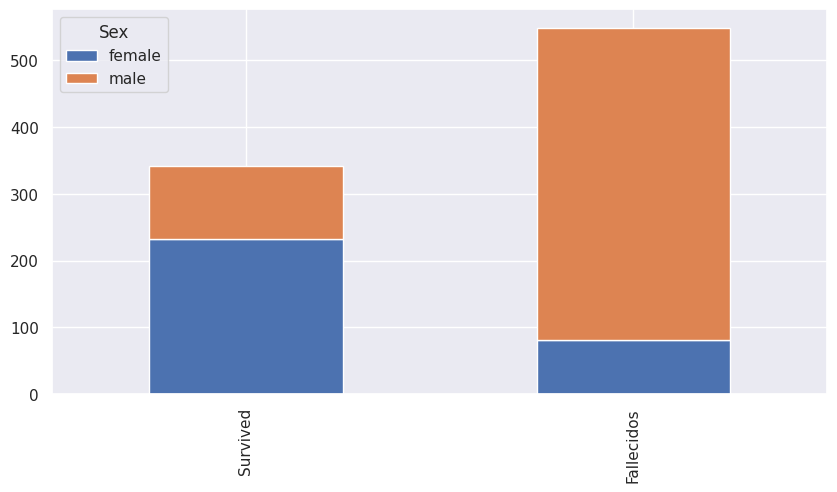

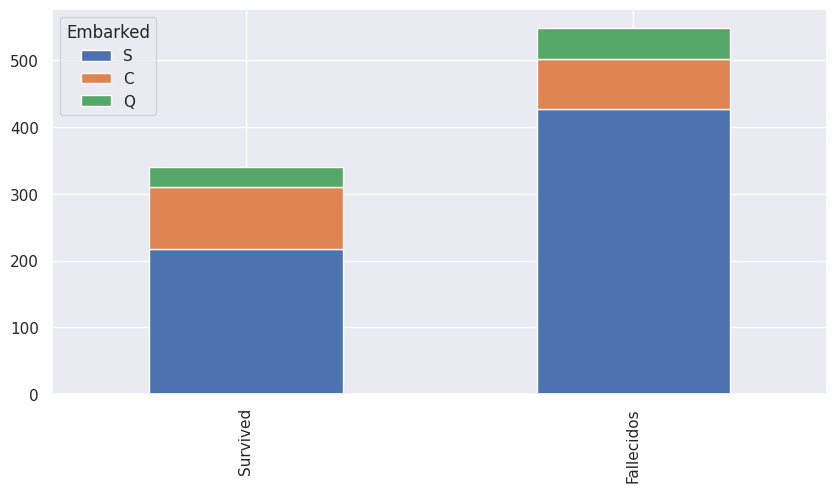

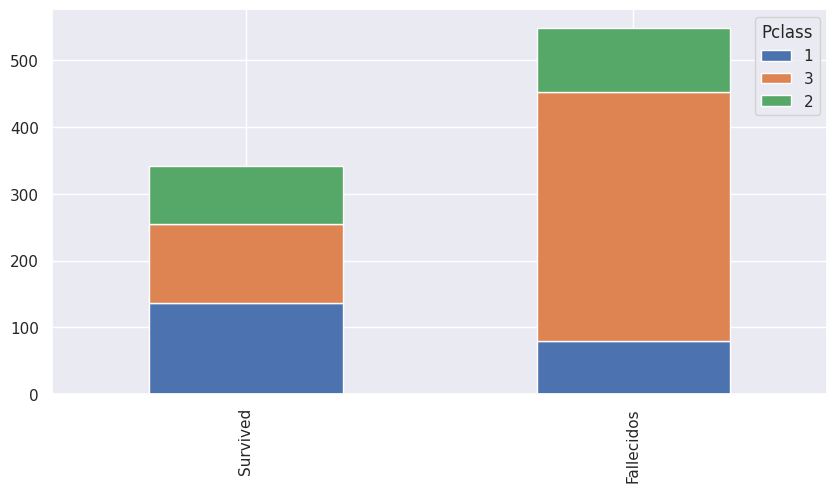

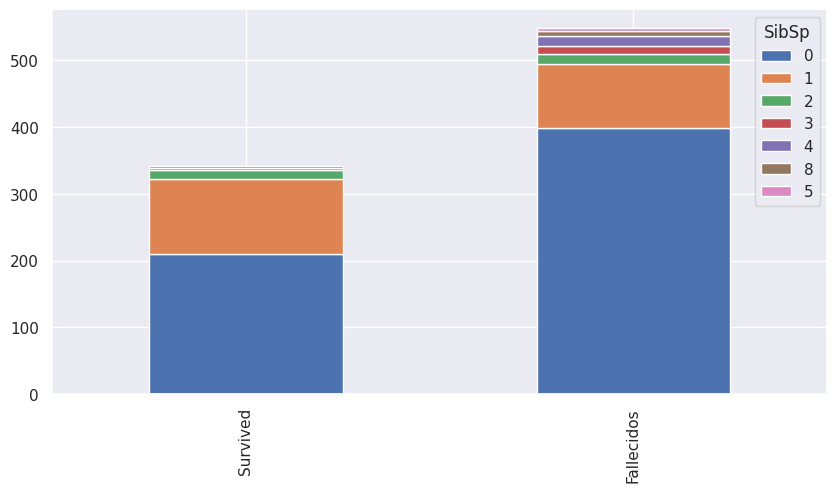

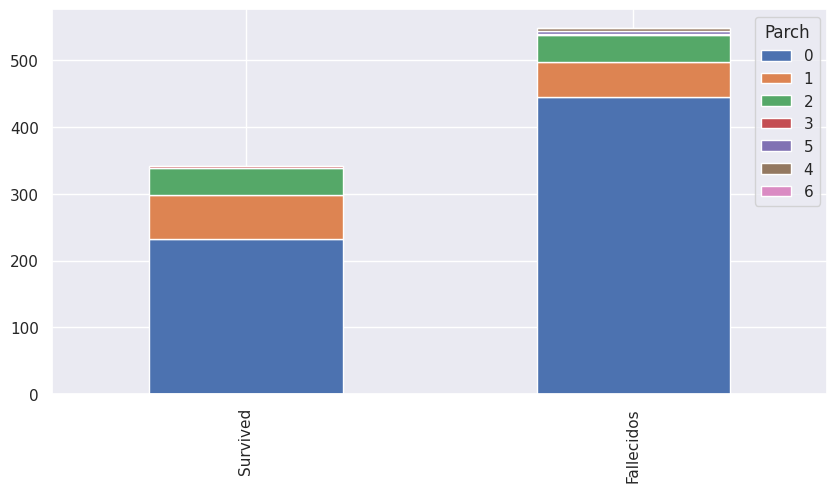

In [ ]:
Pregunta objetivo: Jack se salvaba si Rose le hubiera hecho campito?

##Pasos del EDA
 #**Realizar un análisis descriptivo de las varialbes**
 #**Re-ajustar tipos de variables**
 #**Detectar y tratar datos ausentes** (NaN) que nos permitirá procesar adecuadamente variables numéricas
 #**Identificar datos atípicos y tratarlos de forma adecuada**. Esto mitigará la distorsión de futuros análisis estadísticos
 #**Realizar un exámen

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df=pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")
df.head()

###Diccionario de datos



#Survived_ 1=Sobrevive, 0=No sobrevive

#sibsp: Hermanos o esposo abordo

#parch: Padres e hijos abordo

#ticket: Número del tiquete

#embarket: Puerto de embarque, S:Southampton, C:Cherbourg, Q:Queenstown *Sex:male/female

##Análisis descriptivo
#Tomar cada una de las características y analizar

def bar_char(feature):
  survived=df[df['Survived']==1][feature].value_counts()
  dead=df[df["Survived"]==0][feature].value_counts()
  test=pd.DataFrame([survived,dead])
  test.index=['Survived','Fallecidos']
  test.plot(kind="bar",stacked=True,figsize=(10,5))

bar_char("Sex")

#Las **mujeres** mostraron mayor tasa de supervivencia (casi del 60%) en comparación a los **hombre**

df.columns

df.info()

bar_char("Embarked")

#La gráfica señala que los que se montaron en C tienen mayor probabilidad de supervivencia. Los que se montaron en S tienen menos tasa de supervivencia.

bar_char("Pclass")

#Pclass 1 tiene mayor probabilidad de sobrevivir con respecto a Pclass 3.

bar_char("SibSp")

#Las personas solteras presentan menor probabilidad de supervivenciaen comparación con aquellas casadas o en familia

bar_char("Parch")

#La gráfica muestra que la probabilidad de supevivencia aumentaba si tenías entre 1 y 3 hijos, disminuía si eres soltero o con más de 3 hijos.

##Ingeniería de características
#Es el proceso de usar el dominio del conocimiento para crear nuevas características (feature vectors) que logre que los algoritmos de machine learning funcionen adecuadamente.

df.info()

###2. Creando feature vectors

def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.",expand=True)
  return titles

df["titles"]=extract_title(df)
df.head()

def replace_titles(data):
  title_mapping={"Mr":"Señor","Miss":"Señorita", "Mrs":"Señora"}
  data["titles"]=data["titles"].map(title_mapping).fillna("Otros")
  return data

df=replace_titles(df)
df.head()

In [ ]:
# ==========================================
# ANÁLISIS EXPLORATORIO DEL TITANIC - RESPUESTAS
# ==========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
df = pd.read_csv("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

# ==============================
# 1️⃣ Cantidad total, sobrevivientes y tasa global
# ==============================
total = len(df)
sobrevivientes = df["Survived"].sum()
fallecidos = total - sobrevivientes
tasa_supervivencia = sobrevivientes / total * 100

print(f"Total de pasajeros con datos: {total}")
print(f"Sobrevivientes: {sobrevivientes}")
print(f"Fallecidos: {fallecidos}")
print(f"Tasa global de supervivencia: {tasa_supervivencia:.2f}%")


Total de pasajeros con datos: 891
Sobrevivientes: 342
Fallecidos: 549
Tasa global de supervivencia: 38.38%



Distribución por sexo:
Sex
male      577
female    314
Name: count, dtype: int64

Distribución por clase y sexo:
Sex     female  male  All
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
All        314   577  891


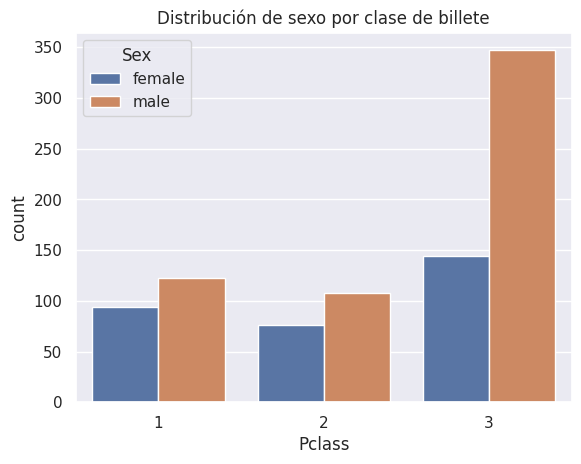

In [ ]:
# ==============================
# 2️⃣ Distribución por sexo y clase
# ==============================
sexo = df["Sex"].value_counts()
print("\nDistribución por sexo:")
print(sexo)

sexo_clase = pd.crosstab(df["Pclass"], df["Sex"], margins=True)
print("\nDistribución por clase y sexo:")
print(sexo_clase)

sns.countplot(x="Pclass", hue="Sex", data=df)
plt.title("Distribución de sexo por clase de billete")
plt.show()


Supervivencia por sexo:
        sum  count   Tasa (%)
Sex                          
female  233    314  74.203822
male    109    577  18.890815


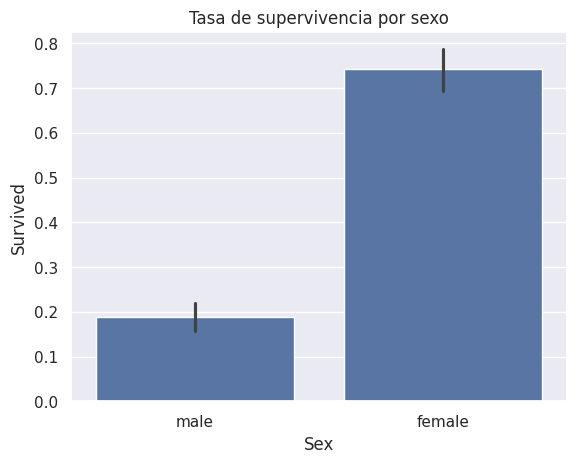

In [ ]:
# ==============================
# 3️⃣ Supervivencia por sexo
# ==============================
supervivencia_sexo = df.groupby("Sex")["Survived"].agg(["sum","count"])
supervivencia_sexo["Tasa (%)"] = supervivencia_sexo["sum"]/supervivencia_sexo["count"]*100
print("\nSupervivencia por sexo:")
print(supervivencia_sexo)

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Tasa de supervivencia por sexo")
plt.show()


Pasajeros con edad registrada: 714
Pasajeros sin edad registrada: 177


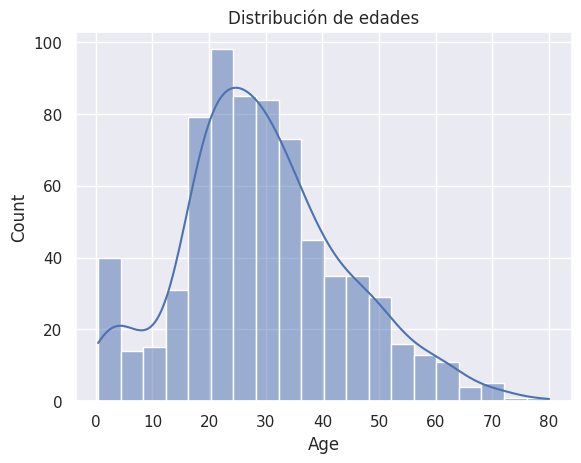

In [ ]:
# ==============================
# 4️⃣ Información sobre edad
# ==============================
faltan_edad = df["Age"].isna().sum()
con_edad = total - faltan_edad
print(f"\nPasajeros con edad registrada: {con_edad}")
print(f"Pasajeros sin edad registrada: {faltan_edad}")

sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribución de edades")
plt.show()


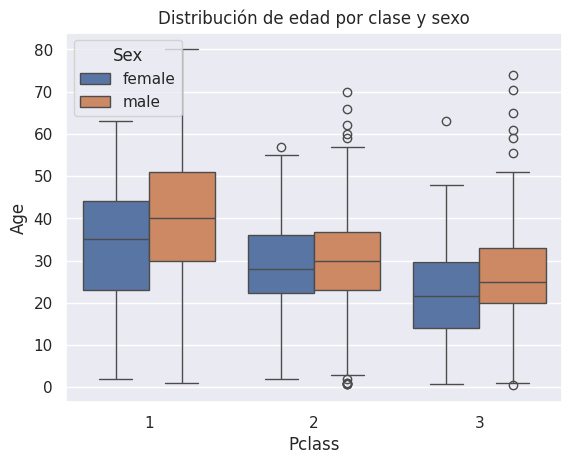

In [ ]:
# ==============================
# 5️⃣ Distribución edad por clase y sexo
# ==============================
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=df)
plt.title("Distribución de edad por clase y sexo")
plt.show()

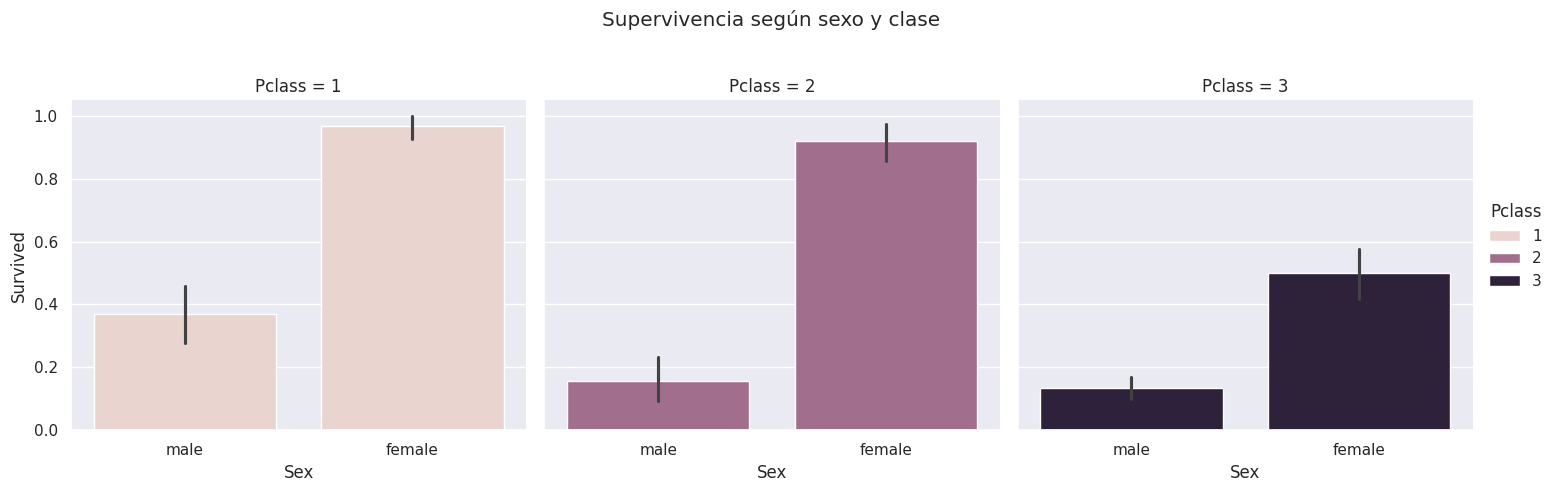

In [ ]:
# ==============================
# 6️⃣ Influencia sexo, clase y edad en supervivencia
# ==============================
sns.catplot(x="Sex", y="Survived", hue="Pclass", col="Pclass",
            kind="bar", data=df)
plt.subplots_adjust(top=0.8)
plt.suptitle("Supervivencia según sexo y clase")
plt.show()

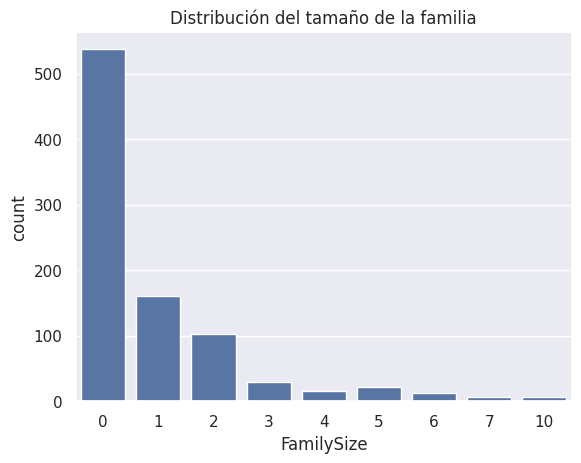


Distribución del número de familiares a bordo:
FamilySize
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: count, dtype: int64


In [ ]:
# ==============================
# 7️⃣ Distribución de miembros de familia (SibSp + Parch)
# ==============================
df["FamilySize"] = df["SibSp"] + df["Parch"]
sns.countplot(x="FamilySize", data=df)
plt.title("Distribución del tamaño de la familia")
plt.show()

familia = df["FamilySize"].value_counts().sort_index()
print("\nDistribución del número de familiares a bordo:")
print(familia)


In [ ]:
# ==============================
# 9️⃣ Tarifa media por persona (corrigiendo tickets compartidos)
# ==============================
df["GroupCount"] = df.groupby("Ticket")["Ticket"].transform("count")
df["Fare_per_person"] = df["Fare"] / df["GroupCount"]

tarifa_media = df["Fare_per_person"].mean()
print(f"\nTarifa media por persona (corrigiendo grupos): {tarifa_media:.2f}")



Tarifa media por persona (corrigiendo grupos): 17.79


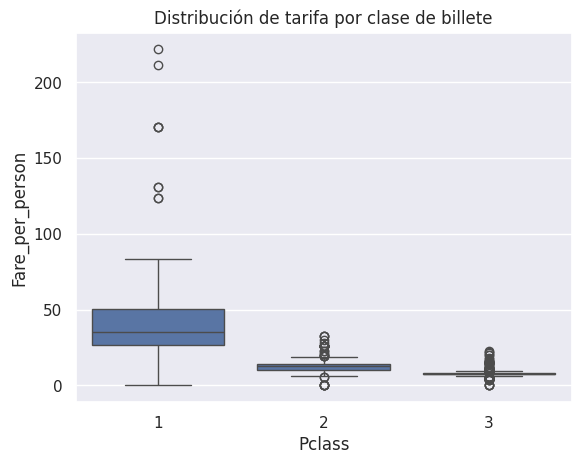


Distribución de tarifa por clase:
        count       mean        std  min    25%      50%        75%       max
Pclass                                                                       
1       216.0  43.650347  30.322236  0.0  26.55  35.2500  50.660392  221.7792
2       184.0  13.322599   5.648278  0.0  10.50  13.0000  13.858658   32.5000
3       491.0   8.085857   2.393923  0.0   7.25   7.8542   8.050000   22.5250


In [ ]:
# ==============================
# 🔟 Distribución de tarifa por clase de billete
# ==============================
sns.boxplot(x="Pclass", y="Fare_per_person", data=df)
plt.title("Distribución de tarifa por clase de billete")
plt.show()

tarifa_por_clase = df.groupby("Pclass")["Fare_per_person"].describe()
print("\nDistribución de tarifa por clase:")
print(tarifa_por_clase)
